<a href="https://colab.research.google.com/github/NganTran-0017/HIDS/blob/main/ML_HIDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Update remove duplicate between train and test --> create independent test
check why test set after removing the intersection (aka independent test) has no frequent record? --> no, set(independent test) has fewer records than independent test.
So the previous clean_data method removes duplication and overlap instances, while the new method (remove_duplicate) only removes overlap instance


!rm *.txt
! rm *.int

In [1]:
#@title Specify parameters before running


SZ =  1#@param {type:"number"}         # Indicate a fraction number to sample train set when it's too big. Located in Data Partition

SEQ_WINDOW =  25#@param {type:"integer"} # Indicate the window length to parse the sequence into. Used in Data Parsing section

BATCH_SZ =  32#@param {type:"integer"} # Indicate the window length to parse the sequence into. Used in Data Parsing section

EPOCHS =  2#@param {type:"integer"} # Indicate the window length to parse the sequence into. Used in Data Parsing section

# Indicate to clean data or not. Used in Data Cleaning section
CLEAN = True #@param {type:"boolean"}
DATA = "Live-Named" #@param {type:"string"}


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, roc_curve, auc, recall_score, precision_score,plot_confusion_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline

#import nltk
#nltk.download("popular")
## Tokenizing syscall sequences into n-grams of 6
#from nltk.tokenize import word_tokenize
#from nltk import ngrams

## **Preparing data for data partition**
- Combine data and labels together. 
- Combine data from each class together --> Create a pool of data 
- Split data pool into train and test

## **Cleaning**
- Remove dupplication between train and test

- 2 directions for Testing set:
  *  Test with clean data: Remove overlap and dupplication between Normal and Intrusion in Test data
  *  Test with Unclean data: Leave Test data as is

- 2 directions Training set:
  *   Clean model: Remove overlap and dupplication between Normal and Intrusion in Train data
  *   Unclean model: Leave Train data as is



#**Load partitioned data from here**

In [3]:
from google.colab import files
files.upload()

Saving Live-Named-Duplication-test.zip to Live-Named-Duplication-test.zip
Saving test_clean.csv to test_clean.csv
Saving test_unclean.csv to test_unclean.csv
Saving train_clean.csv to train_clean.csv


{'Live-Named-Duplication-test.zip': b'PK\x03\x04\x14\x00\x00\x00\x08\x00c\t\x91T\xcd\xd7\xffW\xea\x91\x00\x00\xbc\xeb\x06\x00\x1a\x00\x1c\x00Live-Named-10-dup-test.csvUT\t\x00\x03*i[b*i[bux\x0b\x00\x01\x04\x00\x00\x00\x00\x04\x00\x00\x00\x00\xc5\xbd[r+=\x0f\x04\xf6\xee\xb5\xf8\xaf\x92e\xd9\xa3o\x0f\xd9DR\x95\xb7\xec\xff9\x1e\xcd\x8d$\x80F7\xa8\x93\x94\xad\xd2h.\x1c\x12\x97&H\x02\xe0\xed\xf3\xeb\xf3\xfe\xf9\xfd\xf9\xf8\xfc\xf9\xfc\xfd\\>\x9f\x9f\xff}~\xdd>\xbf\xbe>\xbf\xee\x9f_\xdf\x9f_\x8f\xcf\xaf\x9f\xcf\xaf\xdf\xcf\xaf\xe5\xf3\xeb\xf9\xf9\xf5\xdf\xe7\xfd\xf6y\xff{\xe6\xfey\xff\xfe\xbc?>\xff\x8f\xff\xf3\xff\xfa\xbf\xff\x9f\x8f\xe5\xf9\xf9\xf7\xffu\xbb_\x9f\xfb\xefz\xea\xb9\xfd\xba\xae?~\xfa\xdb\x92\xdbo\x1f\xe6\x94\xfd\x15=|\\{\x9a\xc3\xbf\x1bnN\xa5\xdb\xca%ez\xd7\xb6\xa3W\xc1n\x1bQ\xb1\xb0\xc8\xe3\xe9\xb3h\xa5>\xc3\x1d\xdbQs\xb2)\xf8\x91\xd2\x90g\xf4@\x8c\xb0\xc6\xa6>\x1c\xc9o\x1f\x02\xa7\xb2\xdbzBmEo\xe7\xbe\xfft\xe1\xf6\xcb\xd69\xab\x8a\'s\x12\xf3\x82\x9a\xff\xd5\x98\xa8\x92\xcb\xf

In [4]:
# Read in data
if CLEAN:   x_train = pd.read_csv('train_clean.csv', header = 0)
else:       x_train = pd.read_csv('train.csv.gz', header = 0, compression = 'gzip')
test_clean = pd.read_csv('test_clean.csv', header = 0)
test_unclean = pd.read_csv('test_unclean.csv', header = 0)

x_train.rename(columns = {'25': 'Label'}, inplace = True)
test_clean.rename(columns = {'25': 'Label'}, inplace = True)
test_unclean.rename(columns={'25':'Label'}, inplace=True)

In [5]:
x_train

0    1    2    3    4    5    6    7    8    9  ...   16   17   18  \
0       78  104   78   82  102   78   78   30  106  102  ...  102   78   78   
1      126   78  102  126   78  102  126   78  102  126  ...  126   78   82   
2       78  102   78   78  102   78   78  102   78   78  ...   78   78  102   
3      125   91  125  125  136   49   24   47   50   78  ...    6    6    6   
4       78  126   78  102  126   78   82  126   78  102  ...  126   78   82   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
26558  102   78   78  102  102  126   78   82  102  126  ...  102  126   78   
26559  126   78  102  126   78  102  126   78  102  126  ...   78   78  102   
26560   78  102  126   78   82  102   78   78  102  126  ...   78   78  102   
26561   82  102  126   82  102   78   78  102  102  126  ...  102  102  102   
26562   78   78   30  106  102   78   78   30  106  102  ...   82  102   78   

        19   20   21   22   23   24  Label  
0      102  102   78   78  102  102      0  
1      102   78   78  102  102  102      0  
2      102  126   78   82  102   78      0  
3        6    6    6    6    6    6      0  
4      126   78  102  126   78   82      0  
...    ...  ...  ...  ...  ...  ...    ...  
26558   82  126   78  102  126   78      0  
26559   78   78   45  102  102  102      0  
26560  126   82  119  126   78  102      0  
26561  126   78   82  102   78   78      0  
26562   78  102  102  126   78   82      0  

[26563 rows x 26 columns]

In [6]:
test_clean

0    1    2    3    4    5    6    7    8    9  ...   16   17   18  \
0      78  102  102   78   78  102  126   82  102  126  ...  126   82  102   
1     102  126   78   82  102   78   78  102  102  102  ...  102  126   78   
2     102  102  126   78   82  126   78  102  126   78  ...   82  102   78   
3      82  102   78   78  102  102  126   78   82  102  ...  126   78   82   
4     102  126   78   82  102   78   78  102  102  126  ...  102   78   78   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5117   78   78   45  102  126   78   82  102   78   78  ...  102  126   82   
5118  126   78   82  102  126   78   82  102   78   78  ...  102  102  126   
5119   78   78   30  106  102  126   78  102   78  102  ...   78   30  106   
5120  102  102  126   78  102  126   78   82  126   78  ...  126   78   82   
5121   78  102   78   78  102   78   78  102  102  126  ...   78   82  102   

       19   20   21   22   23   24  Label  
0      78   78  102  102  126   82      0  
1     102  126   78   82  102   78      0  
2      78   45  102  102  126   78      0  
3     102  126   78   82  102   78      0  
4     102  126   78   82  126   78      0  
...   ...  ...  ...  ...  ...  ...    ...  
5117  102   78   78  102  102  126      0  
5118   78   82  102   78   78  102      0  
5119  102  126   78  104   78   82      0  
5120  102   78   78  102  102  126      0  
5121   78   78  102  102  126   78      0  

[5122 rows x 26 columns]

In [7]:
# SZ proportion is used when duplicated training data is not removed and the training sz is too big

#x_train['Label'] = y_train
#x_train = x_train.sample(frac= SZ) # Shuffle data with a SZ proportion
#x_train.reset_index(drop=True, inplace=True)

# Separate data and label
y_train = x_train['Label']
x_train.drop(columns='Label', inplace=True)

y_test_clean = test_clean['Label']
test_clean.drop(columns = 'Label', inplace=True)

y_test_unclean = test_unclean['Label']
test_unclean.drop(columns = 'Label', inplace=True)

In [8]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
26558    0
26559    0
26560    0
26561    0
26562    0
Name: Label, Length: 26563, dtype: int64

In [9]:
!unzip Live-Named-Duplication-test.zip

Archive:  Live-Named-Duplication-test.zip
  inflating: Live-Named-10-dup-test.csv  
  inflating: Live-Named-15-dup-test.csv  
  inflating: Live-Named-20-dup-test.csv  
  inflating: Live-Named-25-dup-test.csv  
  inflating: Live-Named-30-dup-test.csv  
  inflating: Live-Named-35-dup-test.csv  
  inflating: Live-Named-40-dup-test.csv  
  inflating: Live-Named-45-dup-test.csv  
  inflating: Live-Named-50-dup-test.csv  
  inflating: Live-Named-55-dup-test.csv  
  inflating: Live-Named-5-dup-test.csv  
  inflating: Live-Named-60-dup-test.csv  
  inflating: Live-Named-65-dup-test.csv  
  inflating: Live-Named-70-dup-test.csv  
  inflating: Live-Named-75-dup-test.csv  
  inflating: Live-Named-80-dup-test.csv  
  inflating: Live-Named-85-dup-test.csv  
  inflating: Live-Named-90-dup-test.csv  
  inflating: Live-Named-95-dup-test.csv  
replace test_clean.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [18]:
# Get a list of testing files
test_list = !find . -name "Live-Named-*.csv"
test_files = []
for f in test_list:
  test_files.append(pd.read_csv(f, sep=',', header=0))

# Get duplication order
dup_order = []
for f in test_list:
  tokens = f.split('-')
  dup_order.append(int(tokens[2]))

test_list, dup_order

(['./Live-Named-80-dup-test.csv',
  './Live-Named-15-dup-test.csv',
  './Live-Named-35-dup-test.csv',
  './Live-Named-60-dup-test.csv',
  './Live-Named-95-dup-test.csv',
  './Live-Named-45-dup-test.csv',
  './Live-Named-25-dup-test.csv',
  './Live-Named-40-dup-test.csv',
  './Live-Named-30-dup-test.csv',
  './Live-Named-75-dup-test.csv',
  './Live-Named-5-dup-test.csv',
  './Live-Named-55-dup-test.csv',
  './Live-Named-70-dup-test.csv',
  './Live-Named-85-dup-test.csv',
  './Live-Named-50-dup-test.csv',
  './Live-Named-65-dup-test.csv',
  './Live-Named-90-dup-test.csv',
  './Live-Named-10-dup-test.csv',
  './Live-Named-20-dup-test.csv'],
 [80, 15, 35, 60, 95, 45, 25, 40, 30, 75, 5, 55, 70, 85, 50, 65, 90, 10, 20])

In [19]:
test_files[0]

0    1    2    3    4    5    6    7    8    9  ...   16   17   18  \
0      78  102  102  102  102   78   78  102  102  126  ...   78   78  102   
1     102  104  104  102  104  104  102  104  104  102  ...  104  102  104   
2     106  102  126   78  102   78  104   78   82  102  ...   78   82  102   
3      78   78  102  102  102  102  126   78   82  102  ...  102   78   78   
4     102   78   78  146  102  126   78   82  102   78  ...    3    6  126   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5117  126   82  102  126   82  102   78   78  102  126  ...  102   78  102   
5118  126   82  102   78   78  102  102  102  102   45  ...   82  102   78   
5119   82  102   78   78  102  126   78   82  102   78  ...   78   82  126   
5120  102  102  126   78   82  102   78   78  102   78  ...  102   78   78   
5121  102   78   78   30  106  102   78   78   30  106  ...   78   78  102   

       19   20   21   22   23   24  Label  
0     126   82  102   78   78  102      0  
1     104  102  104  104  102  104      0  
2      78   78  102  102  126   78      0  
3     102  102   78   78  102   78      0  
4      78   82  102   78   78  102      0  
...   ...  ...  ...  ...  ...  ...    ...  
5117   78  102   78   78  104   78      0  
5118   78  102   78   78  102   78      0  
5119   78  102  126   78  102  126      0  
5120  102  126   78   82  102   78      0  
5121  126   82  102   78   78  102      0  

[5122 rows x 26 columns]

 ## **Clean Train**
 Remove rows that exist in both normal and intrusion and rows that frequently appear within each class

In [20]:
## Get % of duplicates in both datasets

# Convert normal df to set, and intrusion df to set
def clean_data(normal, intrusion):
  normal_list = normal.values.tolist()
  intrusion_list = intrusion.values.tolist()
  normal_set = set(tuple(i) for i in normal_list)
  intrusion_set = set(tuple(i) for i in intrusion_list)
  print('List sz vs. Set sz of normal sequences: %d vs. %d'% (len(normal_list),len(normal_set)) )
  print('List sz vs. Set sz of intrusion sequences: %d vs. %d'% (len(intrusion_list),len(intrusion_set)) )
    
  normal_dupplication = (len(normal_list) - len(normal_set)) /len(normal_list)*100 
  intrusion_duplication = (len(intrusion_list)-len(intrusion_set))/len(intrusion_list) * 100

  print('Duplication Rate in Normal Class: %.3f%%'% normal_dupplication )
  print('Duplication Rate in Intrusion Class: %.3f%%'% intrusion_duplication) 
 
  c_intrusion = intrusion_set - normal_set 
  overlap_rate =  len(normal_set.intersection(intrusion_set)) / len(normal_set.union(intrusion_set)) * 100
  print('Overlap rate: %.3f%%' % overlap_rate)
  
  #c_normal = normal_set - intrusion_set
  if len(c_intrusion) == 0:
    print(DATA+' No Duplication!')
  if len(c_intrusion) > 0:
    intrusion = pd.DataFrame(c_intrusion)
  else:
    intrusion = pd.DataFrame(intrusion_set)
  #if len(c_normal) > 0:
  #  normal = pd.DataFrame(c_normal)
  #else:
  normal = pd.DataFrame(normal_set)

  print('After cleaning: \nNormal sz:', len(normal), ' Intrusion sz:', len(c_intrusion) )
  return normal, intrusion


# If the CLEAN parameter at the top is checked, we'll train the model with clean data
if CLEAN:
  filt = y_train == 0
  train_normal = x_train.loc[filt]
  train_intrusion = x_train.loc[~filt]
  normal, intrusion = clean_data(train_normal, train_intrusion) # clean normal and intrusion in Train 

  normal['Label'] = 0; intrusion['Label'] = 1
  x_train = normal.append(intrusion, ignore_index = True)
  x_train = x_train.sample(frac = 1)
  x_train.reset_index(drop=True, inplace = True)
  y_train = x_train['Label']
  x_train.drop(columns = 'Label', inplace = True)

List sz vs. Set sz of normal sequences: 26250 vs. 26250
List sz vs. Set sz of intrusion sequences: 313 vs. 313
Duplication Rate in Normal Class: 0.000%
Duplication Rate in Intrusion Class: 0.000%
Overlap rate: 0.000%
After cleaning: 
Normal sz: 26250  Intrusion sz: 313


In [ ]:
#x_train['Label'] = y_train
#x_train.to_csv('train_clean.csv', index=False)
x_train

In [22]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
26558    0
26559    0
26560    0
26561    0
26562    0
Name: Label, Length: 26563, dtype: int64

If there is not enough data from either class, bootstrap to generate more data and create a balanced sample

In [23]:
#intrusion_train = x_train.loc[~filt]
#intrusion_train

# Separate normal and intrusion in Test Clean so that I can call func clean_data on them
def separate_two_classes (data, label):
  ## Filter normal data from Test and drop label column
  filt = label == 0
  normal_class = data.loc[filt]
  #normal_class.drop(columns = 'Label', inplace = True)

  ## Filter Intrusion data from Test and drop label column
  intrusion_class = data.loc[~filt]
  #intrusion_class.drop(columns = 'Label', inplace = True)
  return normal_class, intrusion_class

normal_train, intrusion_train = separate_two_classes(x_train, y_train)

In [24]:
# Bootstrap training data

## Lived-name has more intrusion cases than normal cases (189 > 71) --> bootstrap normal cases only
x_train['Label'] = y_train
if len(intrusion_train) > len(normal_train):
  x_train = x_train.iloc[intrusion_train.index].append(x_train.iloc[normal_train.index].sample(n = len(intrusion_train), replace=True), ignore_index=True) #upsampled normal data and add to train set
else:
  x_train = x_train.iloc[normal_train.index].append(x_train.iloc[intrusion_train.index].sample(n = len(normal_train), replace=True), ignore_index=True) #upsampled intrusion data and add to train set

#x_train = x_train.append(x_train.sample(frac=1), ignore_index=True) # Bootstrap training data in case there is not enough data
x_train = x_train.sample(frac= SZ) # Shuffle data with a SZ proportion
x_train.reset_index(drop=True, inplace=True)
y_train = x_train['Label']
x_train.drop(columns='Label', inplace=True)
x_train

0    1    2    3    4    5    6    7    8    9   ...   15   16   17  \
0        4  104   78   82  102   78   78   30  106  102  ...  102  102   78   
1      102   78   78   30  106  102   78   78   30  106  ...  102   78   78   
2       78  102  126   78   82  102   78   78  102   78  ...   78   78  102   
3      114  126  126  126  114  119   67  126  126    3  ...   -1   -1   -1   
4       19    6   91  108   90    4    1   -1   -1   -1  ...   -1   -1   -1   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
52495  104  104  102  104  104  102  104    4  104  102  ...  102  104  104   
52496   82  102   78   78  102   78   78  102  126   78  ...  126   78   82   
52497  102  126   78   82  102   78   78   45  102  126  ...   20    4  102   
52498   20    5  108   90    3    3    6   91  102  126  ...   78   78  102   
52499   78  102  102  102  126   78   82  102   78   78  ...  102  102  126   

        18   19   20   21   22   23   24  
0       78  102  102  126   82  102   78  
1       30  106  102   78   78  102  102  
2      102  102  126   78   82  102   78  
3       -1   -1   -1   -1   -1   -1   -1  
4       -1   -1   -1   -1   -1   -1   -1  
...    ...  ...  ...  ...  ...  ...  ...  
52495  102  104  104  102  104  104  102  
52496  102   78   78  102  102  126   82  
52497  102  126   82  102   78   78  102  
52498  126   82  102   78   78  102  102  
52499   78   82  102   78   78  102  126  

[52500 rows x 25 columns]

In [25]:
y_train

0        0
1        0
2        0
3        1
4        1
        ..
52495    0
52496    0
52497    1
52498    1
52499    0
Name: Label, Length: 52500, dtype: int64

In [26]:
test_clean

0    1    2    3    4    5    6    7    8    9  ...   15   16   17  \
0      78  102  102   78   78  102  126   82  102  126  ...  102  126   82   
1     102  126   78   82  102   78   78  102  102  102  ...   78  102  126   
2     102  102  126   78   82  126   78  102  126   78  ...   78   82  102   
3      82  102   78   78  102  102  126   78   82  102  ...  102  126   78   
4     102  126   78   82  102   78   78  102  102  126  ...  102  102   78   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5117   78   78   45  102  126   78   82  102   78   78  ...   78  102  126   
5118  126   78   82  102  126   78   82  102   78   78  ...   78  102  102   
5119   78   78   30  106  102  126   78  102   78  102  ...   78   78   30   
5120  102  102  126   78  102  126   78   82  126   78  ...  102  126   78   
5121   78  102   78   78  102   78   78  102  102  126  ...  126   78   82   

       18   19   20   21   22   23   24  
0     102   78   78  102  102  126   82  
1      78  102  126   78   82  102   78  
2      78   78   45  102  102  126   78  
3      82  102  126   78   82  102   78  
4      78  102  126   78   82  126   78  
...   ...  ...  ...  ...  ...  ...  ...  
5117   82  102   78   78  102  102  126  
5118  126   78   82  102   78   78  102  
5119  106  102  126   78  104   78   82  
5120   82  102   78   78  102  102  126  
5121  102   78   78  102  102  126   78  

[5122 rows x 25 columns]

In [27]:
test_unclean

0    1    2    3    4    5    6    7    8    9  ...   15   16   17  \
0      78    3    6  126   82  102   78   78  102  102  ...  102  102  126   
1     126   78   82  102  126   78   82  126   78  126  ...  102   78   78   
2     126   82  102   55   55  102  102  102   78    3  ...    3  102  102   
3     119  126   78  102   78  102   78  102   78  102  ...   13   13   20   
4     119  126   78  102   78  102   78  102   78  102  ...   13   13   20   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5717  102   78   78  102  126   82  102   78   78  102  ...  102  102  126   
5718   78  102   78   45  102   78  102   78  102   78  ...   78   78   30   
5719  126   78   82  102   78   78  102  126   82  102  ...   82  119  126   
5720   82  126   78  102  126   78   82  102   78   78  ...   78   82  126   
5721   78   82  102   78   78  102  102  126   82  102  ...  102  102   78   

       18   19   20   21   22   23   24  
0      78   82  102   78   78  102  102  
1     102  102  126   78   82  126   78  
2     102  102  102  146  126   78   82  
3       4   13   20    4  104   78   82  
4       4   13   20    4  104   78   82  
...   ...  ...  ...  ...  ...  ...  ...  
5717   82  102   78   78  102  126   82  
5718  106  102  126   78  102   78  104  
5719   78  102   78  104   78   82  102  
5720   78  102  126   78  102  126   78  
5721   78  102  102  126   82  102   78  

[5722 rows x 25 columns]


# **Performance Measures**


1.   Function calc_false_positive: Calculates FPR
2.   Function print_performance: Formats printing performance metrics and ROC curve for each model
3.   Function color_confusion_matrix: prints out a heatmap of confusion matrix in blue color scale






In [60]:
clean_status = 'clean' if CLEAN else 'unclean'

# This function calculate False Positive Rate given a confusion matrix
def calc_false_positive (cmatrix):
  specificity = cmatrix[0,0]/(cmatrix[0,0] + cmatrix[0,1])
  return 1-specificity

# This function prints performance metrics and ROC curve given the model name, true labels and predicted labels
def print_performance( model_name, true_labels, pred_labels):
  clean_status = 'clean' if CLEAN else 'unclean'

  # rows are actual, columns are predicted
  cmatrix = confusion_matrix(true_labels, pred_labels)
  fpr = calc_false_positive(cmatrix)

  outfile = open('{}-{}-Models-Output.txt'.format(DATA, clean_status), "a")  # Live-Named-Clean-Models-Output.txt
  outfile.write('\nConfusion Matrix: ' + str(cmatrix))
  outfile.write('\nTesting Accuracy: %.2f'% metrics.accuracy_score(true_labels, pred_labels))
  outfile.write('\nPrecision:%.2f'%  metrics.precision_score(true_labels, pred_labels))
  outfile.write('\nRecall: %.2f'% metrics.recall_score(true_labels, pred_labels))
  outfile.write('\nFalse Positive Rate: %.2f'% fpr)
  outfile.write('\nClassification report:\n'+  str(classification_report(true_labels, pred_labels)) )
  outfile.write('AUC: %.2f \n\n'% roc_auc_score(true_labels, pred_labels))

  print('Confusion Matrix: \n',cmatrix)
  print('\nTesting Accuracy: %.2f'% metrics.accuracy_score(true_labels, pred_labels))
  print('Precision:%.2f'%  metrics.precision_score(true_labels, pred_labels))
  print('Recall: %.2f'% metrics.recall_score(true_labels, pred_labels))
  print('False Positive Rate: %.2f'% fpr)
  print('\nClassification report:', classification_report(true_labels, pred_labels), sep='\n')
  print('AUC: %.2f'% roc_auc_score(true_labels, pred_labels))
  
  outfile.close()
  
  false_positive_rate, recall, thresholds = roc_curve(true_labels, pred_labels)
  roc_auc = auc(false_positive_rate, recall)
  plt.figure()
  if CLEAN: clean_status='Clean '
  else: clean_status ='Overlapped and Duplicated '
  plt.title( model_name+' ROC Curve on '+ clean_status + DATA + ' with Seq Len of '+ str(SEQ_WINDOW))
  plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.2f' %roc_auc)
  plt.legend(loc='lower right')
  plt.plot([0,1], [0,1], 'r--')
  plt.xlim([0.0,1.0])
  plt.ylim([0.0,1.1])
  plt.ylabel('Recall')
  plt.xlabel('False Positive Rate (1-Specificity)')
  #plt.savefig(model_name+'-ROC.jpg')
  plt.show()

# Plot a heatmap of confusion matrix given the model name, a classifier model, testing data and the predicted label
def color_confusion_matrix( model_name, model, x_test, y_test, y_predicted):
  class_names = ['Normal', 'Intrusion']

  fig, ax = plt.subplots(figsize=(6, 6))
  plot_confusion_matrix(model, x_test, y_test, display_labels=class_names, 
                        values_format='d', ax = ax, cmap=plt.cm.Blues)
  plt.title('Confusion Matrix of ' + str(model_name))
  #plt.savefig(model_name+'-CM.jpg')
  plt.show()

  cmatrix = confusion_matrix(y_test, y_predicted)
  print(cmatrix)


# Save performance measure dict of each model to a file
def write_to_file (varname, model_name, clean):
  filename = DATA +'-'+ str(SEQ_WINDOW) +'-'+ clean_status + "-model.txt"
  file = open(filename, "a")
  str_dictionary = repr(varname)
  file.write("{}_test_{} = ".format(model_name, clean) + str_dictionary + "\n")
  file.close()

# This func takes in Test sets to evaluate model. Make it convenient when testing with clean and unclean data
def test_model(data, label, model, model_name, clean):
  if model_name == 'NN':
    y_predicted = np.argmax(model.predict(data), axis=-1)
  else:
    y_predicted = model.predict(data)

  outfile = open('{}-{}-Models-Output.txt'.format(DATA, clean_status), "a")  # Live-Named-Clean-Models-Output.txt
  outfile.write('-------------------- {} on {} data --------------------'.format(model_name, clean))
  outfile.close()
  print('--------------------' + model_name + ' on ' + clean + ' data --------------------')
  print_performance(model_name, label, y_predicted)

  # Recording TPR and FPR for the TESTING ROC curves
  performance = {}
  performance['fpr'], performance['tpr'], thresh = roc_curve(label, y_predicted)
  performance['auc'] = roc_auc_score(label, y_predicted)
  print('Test AUC: %.3f' %(performance['auc']))

  return performance

# **K-means**

In [41]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score

# Choose K cluster = 2
kmeans = KMeans(n_clusters=2)
# Fit Kmeans to the training set
kmeans.fit(x_train)

# Number of iterations before converging
print('Number of iterations before converging:', kmeans.n_iter_)

Number of iterations before converging: 14


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------KM on clean data --------------------
Confusion Matrix: 
 [[4810  179]
 [  59   74]]

Testing Accuracy: 0.95
Precision:0.29
Recall: 0.56
False Positive Rate: 0.04

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      4989
           1       0.29      0.56      0.38       133

    accuracy                           0.95      5122
   macro avg       0.64      0.76      0.68      5122
weighted avg       0.97      0.95      0.96      5122

AUC: 0.76


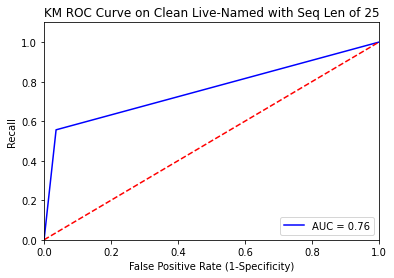

Test AUC: 0.760



--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[5316  231]
 [  65  110]]

Testing Accuracy: 0.95
Precision:0.32
Recall: 0.63
False Positive Rate: 0.04

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      5547
           1       0.32      0.63      0.43       175

    accuracy                           0.95      5722
   macro avg       0.66      0.79      0.70      5722
weighted avg       0.97      0.95      0.96      5722

AUC: 0.79


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


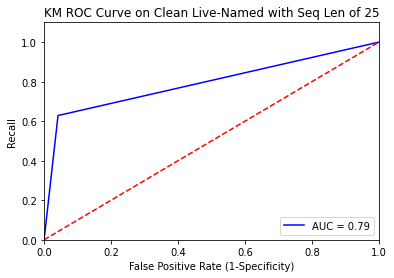

Test AUC: 0.793


In [67]:
## TESTING K-MEANS with clean data and unclean data
KM_clean_perf   = test_model(test_clean, y_test_clean, kmeans, 'KM', 'clean'); print('\n\n')
KM_unclean_perf = test_model(test_unclean, y_test_unclean, kmeans, 'KM', 'unclean')

write_to_file(KM_clean_perf, 'KM', 'clean')
write_to_file(KM_unclean_perf, 'KM', 'unclean')

---------------------Testing with 80% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[4826  163]
 [  64   69]]

Testing Accuracy: 0.96
Precision:0.30
Recall: 0.52
False Positive Rate: 0.03

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4989
           1       0.30      0.52      0.38       133

    accuracy                           0.96      5122
   macro avg       0.64      0.74      0.68      5122
weighted avg       0.97      0.96      0.96      5122

AUC: 0.74


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


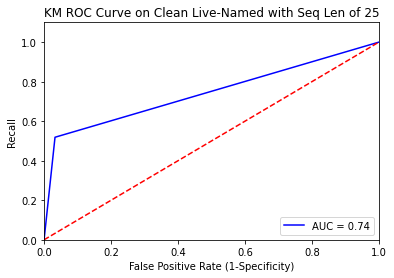

Test AUC: 0.743


---------------------Testing with 15% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[4813  176]
 [  55   78]]

Testing Accuracy: 0.95
Precision:0.31
Recall: 0.59
False Positive Rate: 0.04

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      4989
           1       0.31      0.59      0.40       133

    accuracy                           0.95      5122
   macro avg       0.65      0.78      0.69      5122
weighted avg       0.97      0.95      0.96      5122

AUC: 0.78


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


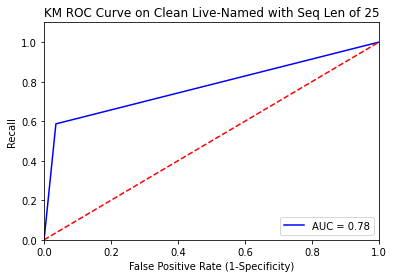

Test AUC: 0.776


---------------------Testing with 35% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[4801  188]
 [  51   82]]

Testing Accuracy: 0.95
Precision:0.30
Recall: 0.62
False Positive Rate: 0.04

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      4989
           1       0.30      0.62      0.41       133

    accuracy                           0.95      5122
   macro avg       0.65      0.79      0.69      5122
weighted avg       0.97      0.95      0.96      5122

AUC: 0.79


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


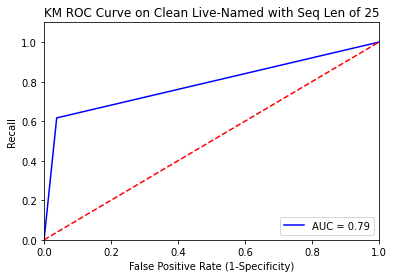

Test AUC: 0.789


---------------------Testing with 60% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[4792  197]
 [  68   65]]

Testing Accuracy: 0.95
Precision:0.25
Recall: 0.49
False Positive Rate: 0.04

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      4989
           1       0.25      0.49      0.33       133

    accuracy                           0.95      5122
   macro avg       0.62      0.72      0.65      5122
weighted avg       0.97      0.95      0.96      5122

AUC: 0.72


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


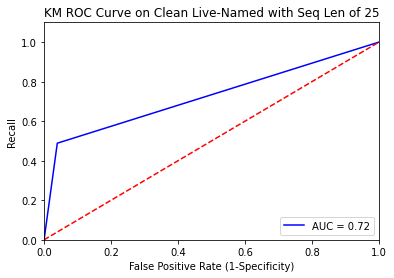

Test AUC: 0.725


---------------------Testing with 95% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[4751  238]
 [  58   75]]

Testing Accuracy: 0.94
Precision:0.24
Recall: 0.56
False Positive Rate: 0.05

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      4989
           1       0.24      0.56      0.34       133

    accuracy                           0.94      5122
   macro avg       0.61      0.76      0.65      5122
weighted avg       0.97      0.94      0.95      5122

AUC: 0.76


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


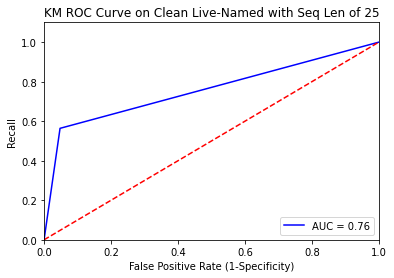

Test AUC: 0.758


---------------------Testing with 45% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[4806  183]
 [  60   73]]

Testing Accuracy: 0.95
Precision:0.29
Recall: 0.55
False Positive Rate: 0.04

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      4989
           1       0.29      0.55      0.38       133

    accuracy                           0.95      5122
   macro avg       0.64      0.76      0.68      5122
weighted avg       0.97      0.95      0.96      5122

AUC: 0.76


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


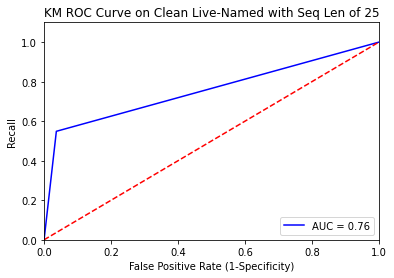

Test AUC: 0.756


---------------------Testing with 25% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[4820  169]
 [  57   76]]

Testing Accuracy: 0.96
Precision:0.31
Recall: 0.57
False Positive Rate: 0.03

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4989
           1       0.31      0.57      0.40       133

    accuracy                           0.96      5122
   macro avg       0.65      0.77      0.69      5122
weighted avg       0.97      0.96      0.96      5122

AUC: 0.77


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


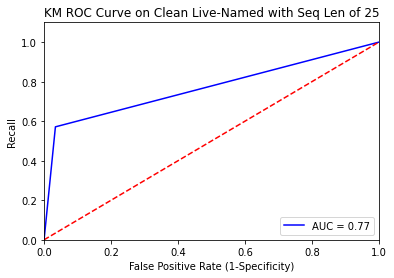

Test AUC: 0.769


---------------------Testing with 40% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[4805  184]
 [  57   76]]

Testing Accuracy: 0.95
Precision:0.29
Recall: 0.57
False Positive Rate: 0.04

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      4989
           1       0.29      0.57      0.39       133

    accuracy                           0.95      5122
   macro avg       0.64      0.77      0.68      5122
weighted avg       0.97      0.95      0.96      5122

AUC: 0.77


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


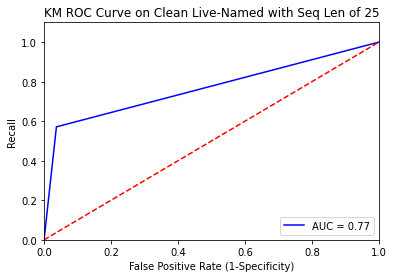

Test AUC: 0.767


---------------------Testing with 30% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[4811  178]
 [  55   78]]

Testing Accuracy: 0.95
Precision:0.30
Recall: 0.59
False Positive Rate: 0.04

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      4989
           1       0.30      0.59      0.40       133

    accuracy                           0.95      5122
   macro avg       0.65      0.78      0.69      5122
weighted avg       0.97      0.95      0.96      5122

AUC: 0.78


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


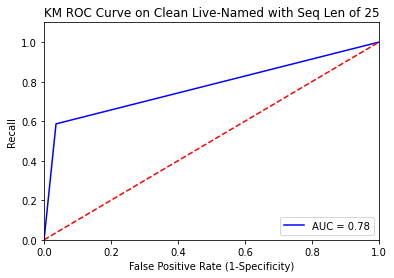

Test AUC: 0.775


---------------------Testing with 75% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[4796  193]
 [  58   75]]

Testing Accuracy: 0.95
Precision:0.28
Recall: 0.56
False Positive Rate: 0.04

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      4989
           1       0.28      0.56      0.37       133

    accuracy                           0.95      5122
   macro avg       0.63      0.76      0.67      5122
weighted avg       0.97      0.95      0.96      5122

AUC: 0.76


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


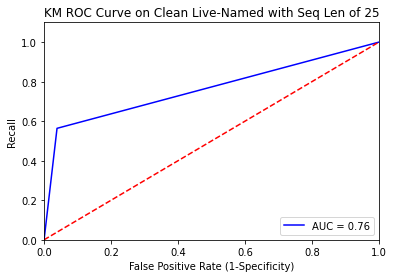

Test AUC: 0.763


---------------------Testing with 5% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[4869  120]
 [  24  109]]

Testing Accuracy: 0.97
Precision:0.48
Recall: 0.82
False Positive Rate: 0.02

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4989
           1       0.48      0.82      0.60       133

    accuracy                           0.97      5122
   macro avg       0.74      0.90      0.79      5122
weighted avg       0.98      0.97      0.98      5122

AUC: 0.90


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


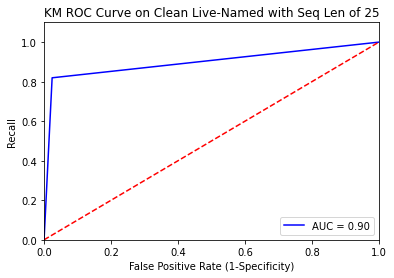

Test AUC: 0.898


---------------------Testing with 55% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[4788  201]
 [  46   87]]

Testing Accuracy: 0.95
Precision:0.30
Recall: 0.65
False Positive Rate: 0.04

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      4989
           1       0.30      0.65      0.41       133

    accuracy                           0.95      5122
   macro avg       0.65      0.81      0.69      5122
weighted avg       0.97      0.95      0.96      5122

AUC: 0.81


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


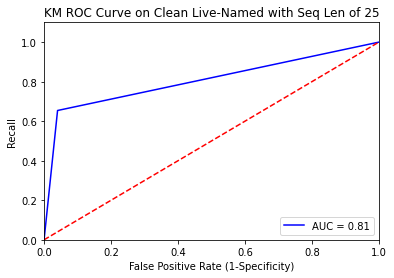

Test AUC: 0.807


---------------------Testing with 70% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[4810  179]
 [  53   80]]

Testing Accuracy: 0.95
Precision:0.31
Recall: 0.60
False Positive Rate: 0.04

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      4989
           1       0.31      0.60      0.41       133

    accuracy                           0.95      5122
   macro avg       0.65      0.78      0.69      5122
weighted avg       0.97      0.95      0.96      5122

AUC: 0.78


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


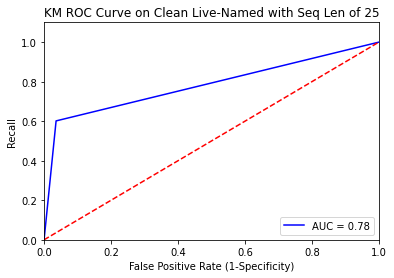

Test AUC: 0.783


---------------------Testing with 85% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[4860  129]
 [  55   78]]

Testing Accuracy: 0.96
Precision:0.38
Recall: 0.59
False Positive Rate: 0.03

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4989
           1       0.38      0.59      0.46       133

    accuracy                           0.96      5122
   macro avg       0.68      0.78      0.72      5122
weighted avg       0.97      0.96      0.97      5122

AUC: 0.78


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


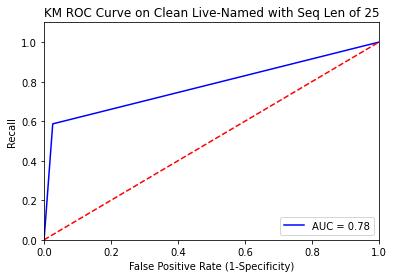

Test AUC: 0.780


---------------------Testing with 50% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[4783  206]
 [  58   75]]

Testing Accuracy: 0.95
Precision:0.27
Recall: 0.56
False Positive Rate: 0.04

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      4989
           1       0.27      0.56      0.36       133

    accuracy                           0.95      5122
   macro avg       0.63      0.76      0.67      5122
weighted avg       0.97      0.95      0.96      5122

AUC: 0.76


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


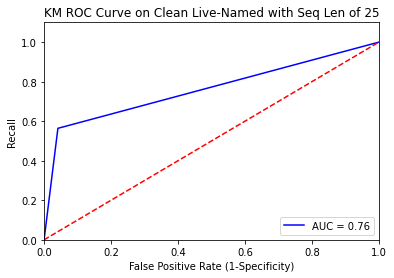

Test AUC: 0.761


---------------------Testing with 65% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[4839  150]
 [  57   76]]

Testing Accuracy: 0.96
Precision:0.34
Recall: 0.57
False Positive Rate: 0.03

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4989
           1       0.34      0.57      0.42       133

    accuracy                           0.96      5122
   macro avg       0.66      0.77      0.70      5122
weighted avg       0.97      0.96      0.96      5122

AUC: 0.77


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


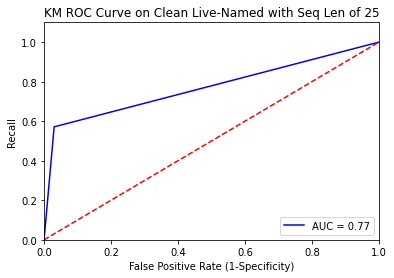

Test AUC: 0.771


---------------------Testing with 90% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[4788  201]
 [  47   86]]

Testing Accuracy: 0.95
Precision:0.30
Recall: 0.65
False Positive Rate: 0.04

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      4989
           1       0.30      0.65      0.41       133

    accuracy                           0.95      5122
   macro avg       0.64      0.80      0.69      5122
weighted avg       0.97      0.95      0.96      5122

AUC: 0.80


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


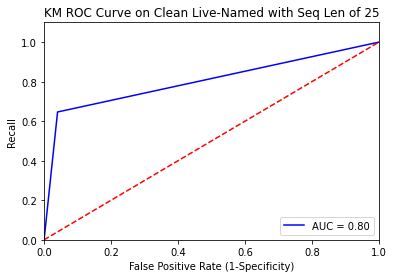

Test AUC: 0.803


---------------------Testing with 10% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[4812  177]
 [  60   73]]

Testing Accuracy: 0.95
Precision:0.29
Recall: 0.55
False Positive Rate: 0.04

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      4989
           1       0.29      0.55      0.38       133

    accuracy                           0.95      5122
   macro avg       0.64      0.76      0.68      5122
weighted avg       0.97      0.95      0.96      5122

AUC: 0.76


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


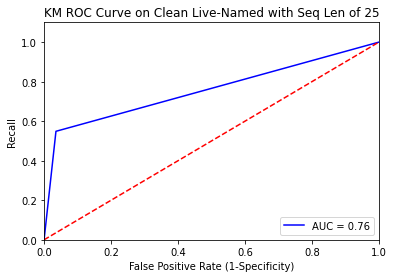

Test AUC: 0.757


---------------------Testing with 20% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[4808  181]
 [  58   75]]

Testing Accuracy: 0.95
Precision:0.29
Recall: 0.56
False Positive Rate: 0.04

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      4989
           1       0.29      0.56      0.39       133

    accuracy                           0.95      5122
   macro avg       0.64      0.76      0.68      5122
weighted avg       0.97      0.95      0.96      5122

AUC: 0.76


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


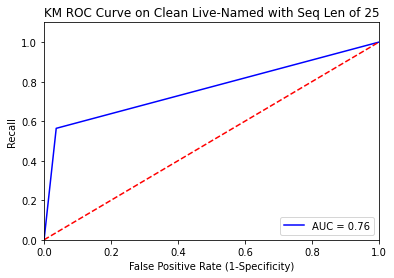

Test AUC: 0.764




In [68]:
def test_with_duplication(model, model_name):
  i = 0
  for f in test_files:
    label = f['Label']; data = f.drop(columns = ['Label'])

    outfile = open('{}-{}-Models-Output.txt'.format(DATA, clean_status), "a")  # Live-Named-Clean-Models-Output.txt
    outfile.write('---------------------Testing with %d%% duplication---------------------'% dup_order[i])
    outfile.close()
    print('---------------------Testing with %d%% duplication---------------------'% dup_order[i])
    test_model(data, label, model, model_name, 'unclean'); print('\n')
    i+=1
  outfile = open('{}-{}-Models-Output.txt'.format(DATA, clean_status), "a")  # Live-Named-Clean-Models-Output.txt
  outfile.write('---------------------------------Finish---------------------------------')
  outfile.close()

test_with_duplication(kmeans, 'KM')

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Fit the model on the training set
lgModel = LogisticRegression().fit(x_train, y_train)

## TESTING Logistic Regression with clean data and unclean data
LR_clean_perf   = test_model(test_clean, y_test_clean, lgModel, 'LR', 'clean'); print('\n\n')
LR_unclean_perf = test_model(test_unclean, y_test_unclean, lgModel, 'LR', 'unclean')

In [ ]:
# Save performance to text file
write_to_file(LR_clean_perf, 'LR', 'clean')
write_to_file(LR_unclean_perf, 'LR', 'unclean')

In [ ]:
# Test with Duplication 
test_with_duplication(lgModel, 'LR')

# **SVM**

This model uses a Polynomial kernel, and the rest of the parameters are as default






In [ ]:
if len(x_train) > 500000: 
  svm_sz = 0.05  
elif len(x_train) > 100000:
  svm_sz = 0.2
else:
  svm_sz = 1

svm_sz

In [ ]:

train_data = x_train.copy(deep=True) # create a deep copy of x_train, so any modification to train_data won't affect x_train
train_data['Label'] = y_train
train_data = train_data.groupby('Label').sample(frac = svm_sz)
train_data.reset_index(drop=True, inplace= True)
#train_data
svm_x_train = train_data.drop(columns='Label')
svm_y_train = train_data['Label']
svm_x_train

In [ ]:
from sklearn import svm

#### Create a SVM classifier using polynomial Kernel
print('\n****Polynomial kernel model: ')
svm_model = svm.SVC(kernel = 'poly')

#Train the  & Get accuracy from training
svm_model.fit(svm_x_train, svm_y_train)

## TESTING SVM with clean data and unclean data
SVM_clean_perf   = test_model(test_clean,   y_test_clean,   svm_model, 'SVM', 'clean'); print('\n\n')
SVM_unclean_perf = test_model(test_unclean, y_test_unclean, svm_model, 'SVM', 'unclean')

# Save performance to text file
write_to_file(SVM_clean_perf, 'SVM', 'clean')
write_to_file(SVM_unclean_perf, 'SVM', 'unclean')


****Polynomial kernel model: 


In [ ]:
# Test with Duplication 
test_with_duplication(svm_model, 'SVM')

 Plot a heatmap confusion matrix
color_confusion_matrix('SVM', svm_model, x_test, y_test, y_predicted)

# **Neural Net**

This model contains 3 layers: input layer of 6 nodes, a fully connected layer of 6 nodes and an output layer of 2 nodes

In [ ]:
# Scale syscall number to between 0 and 1
# The maximum syscall number in UNM data is 181
max_syscall = 181
x_train_nn = x_train/max_syscall
clean_x_test_nn = test_clean/max_syscall
unclean_x_test_nn =  test_unclean/max_syscall

In [ ]:
import tensorflow as tf
from tensorflow import keras
INPUT_SZ = len(x_train.columns)
nn_model = keras.Sequential([
    keras.layers.Input(shape = (INPUT_SZ,)),           # model expect input to be a vector of 6 numbers
    keras.layers.Dense(INPUT_SZ, activation = 'relu'), 
    keras.layers.Dense(2, activation = 'sigmoid')
])

nn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model to training set
history = nn_model.fit(x_train_nn, y_train, epochs=10, batch_size= 32, verbose=1)  

In [ ]:
# Get predicted Training labels
#y_pred = np.argmax(nn_model.predict(x_train_nn), axis=-1)

## TESTING NN with clean data and unclean data
NN_clean_perf   = test_model(clean_x_test_nn,   y_test_clean,   nn_model, 'NN', 'clean'); print('\n\n')
NN_unclean_perf = test_model(unclean_x_test_nn, y_test_unclean, nn_model, 'NN', 'unclean')

In [ ]:
nn_model.summary()

#history.history

In [ ]:
# Save performance to text file
write_to_file(NN_clean_perf, 'NN', 'clean')
write_to_file(NN_unclean_perf, 'NN', 'unclean')

In [ ]:
# Test with Duplication 
test_with_duplication(nn_model, 'NN')

# **Decision Tree**

This model uses GINI criterion to split the data and requires at least 10 observations to split and 5 observations in the leaf.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create and Train DecTree model
decTree = DecisionTreeClassifier(criterion='gini', min_samples_split=10,min_samples_leaf=5,max_features='auto')
decTree = decTree.fit(x_train, y_train)

## TESTING DT with clean data and unclean data
DT_clean_perf   = test_model(test_clean,   y_test_clean,   decTree, 'DT', 'clean'); print('\n\n')
DT_unclean_perf = test_model(test_unclean, y_test_unclean, decTree, 'DT', 'unclean')

# Save performance to text file
write_to_file( DT_clean_perf, 'DT', 'clean')
write_to_file( DT_unclean_perf, 'DT', 'unclean')

# Test with Duplication 
test_with_duplication(decTree, 'DT')

# **Random Forest**

This model has no max depth and allows bootstrapping observations during training. It uses GINI criterion to split and requires a minimum of 10 observations to split and the leaf node must have above 5 observations.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Build model
randomForest = RandomForestClassifier(max_depth=None, min_samples_split=10, min_samples_leaf=5, 
                                      max_features='auto', bootstrap=True,verbose=0, criterion='gini')
# Train the model with training set
randomForest.fit(x_train, y_train)

## TESTING RF with clean data and unclean data
RF_clean_perf   = test_model(test_clean,   y_test_clean,   randomForest, 'RF', 'clean'); print('\n\n')
RF_unclean_perf = test_model(test_unclean, y_test_unclean, randomForest, 'RF', 'unclean')


# Save performance to text file
write_to_file( RF_clean_perf, 'RF', 'clean')
write_to_file( RF_unclean_perf, 'RF', 'unclean')

In [ ]:
# Test with Duplication 
test_with_duplication(randomForest, 'RF')

# **KNN**

This model classifies each observation based on 3 nearest neighbors with uniform weight.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Creat and Train KNN model
KNN = KNeighborsClassifier(n_neighbors=5, weights='uniform')
KNN.fit(svm_x_train, svm_y_train)

# Recording TPR and FPR for the TRAINING ROC curves
#y_pred = KNN.predict(x_train)
#KNN_train = {}
#KNN_train['fpr'], KNN_train['tpr'], thresh = roc_curve(y_train, y_pred)
#KNN_train['auc'] = roc_auc_score(y_train, y_pred)


## TESTING KNN with clean data and unclean data
KNN_clean_perf   = test_model(test_clean,   y_test_clean,   KNN, 'KNN', 'clean'); print('\n\n')
KNN_unclean_perf = test_model(test_unclean, y_test_unclean, KNN, 'KNN', 'unclean')

# Save performance to text file
write_to_file( KNN_clean_perf, 'KNN', 'clean')
write_to_file( KNN_unclean_perf, 'KNN', 'unclean')


In [ ]:
# Test with Duplication 
test_with_duplication(KNN, 'KNN')

# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier and train with training set
NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train, y_train)

# Recording TPR and FPR for the TRAINING ROC curves
#y_pred = NaiveBayes.predict(x_train)
#NB_train = {}
#NB_train['fpr'], NB_train['tpr'], thresh = roc_curve(y_train, y_pred)
#NB_train['auc'] = roc_auc_score(y_train, y_pred)


## TESTING KNN with clean data and unclean data
NB_clean_perf   = test_model(test_clean,   y_test_clean,   NaiveBayes, 'NB', 'clean'); print('\n\n')
NB_unclean_perf = test_model(test_unclean, y_test_unclean, NaiveBayes, 'NB', 'unclean')


# Save performance to text file
write_to_file(NB_clean_perf, 'NB', 'clean')
write_to_file(NB_unclean_perf, 'NB', 'unclean')

In [ ]:
# Test with Duplication 
test_with_duplication(NaiveBayes, 'NB')

# **End**

In [ ]:
def plot_ROC_Clean_Unclean(clean, unclean, model_name):
  colors = {'unclean': 'lightcoral','clean': 'blue'}

  plt.plot(clean.get('fpr'), clean.get('tpr'), color=colors.get('clean'),  label= "AUC on Clean Data =" + str( round(clean.get('auc'), 3) ) )   
  plt.plot(unclean.get('fpr'), unclean.get('tpr'), color=colors.get('unclean'),  label= "AUC on Unclean Data =" + str( round(unclean.get('auc'), 3) ) )   
  plt.title(model_name +' Performance on Clean and Unclean Data')
  plt.legend()
  plt.show()

plot_ROC_Clean_Unclean(KM_clean_perf, KM_unclean_perf, 'KM')
plot_ROC_Clean_Unclean(LR_clean_perf, LR_unclean_perf, 'LR')
plot_ROC_Clean_Unclean(SVM_clean_perf, SVM_unclean_perf, 'SVM')
plot_ROC_Clean_Unclean(NN_clean_perf, NN_unclean_perf, 'NN')
plot_ROC_Clean_Unclean(DT_clean_perf, DT_unclean_perf, 'DT')
plot_ROC_Clean_Unclean(RF_clean_perf, RF_unclean_perf, 'RF')
plot_ROC_Clean_Unclean(KNN_clean_perf, KNN_unclean_perf, 'KNN')
plot_ROC_Clean_Unclean(NB_clean_perf, NB_unclean_perf, 'NB')


# Graphing overlaid ROC curves, where each one represents a model AUC score
def graph_multi_ROC (DATA, SEQ_LEN, CLEAN ):
  # Set color for each model
  colors = {'KM': 'lightcoral','LR': 'darkorange', 'SVM':'lime', 'NB': 'steelblue',
            'NN': 'purple','DT': 'magenta','RF': 'deeppink','KNN': 'darkturquoise',
            'BERT': 'darkred', 'GPT': 'blue'}
  # Set marker for each model          
  markers = {'KM':'1--','LR': 'v--', 'SVM': '^--', 'NN': '*--', 'DT': 'o--', 'RF': '+--', 'KNN': '.--', 'NB': 'x--', 'BERT':'<--', 'GPT': '>--'}
  
  plt.figure(figsize=(9,6))

  plt.plot(KM_test.get('fpr'), KM_test.get('tpr'), markers.get('KM'), color=colors.get('KM'),  label="KM - AUC=" + str( round(KM_test.get('auc'), 3) ) )   
  plt.plot(LR_test.get('fpr'), LR_test.get('tpr'), markers.get('LR'), color=colors.get('LR'),  label="LR - AUC=" + str( round(LR_test.get('auc'),3) ) )
  plt.plot(SVM_test.get('fpr'),SVM_test.get('tpr'),markers.get('SVM'),color=colors.get('SVM'), label="SVM - AUC="+ str( round(SVM_test.get('auc'), 3) ) )
  plt.plot(NN_test.get('fpr'), NN_test.get('tpr'), markers.get('NN'), color=colors.get('NN'),  label="NN - AUC=" + str( round(NN_test.get('auc'), 3) ) )
  plt.plot(DT_test.get('fpr'), DT_test.get('tpr'), markers.get('DT'), color=colors.get('DT'),  label="DT - AUC=" + str( round(DT_test.get('auc'), 3) ) )
  plt.plot(RF_test.get('fpr'), RF_test.get('tpr'), markers.get('RF'), color=colors.get('RF'),  label="RF - AUC=" + str( round(RF_test.get('auc'), 3) ) )
  plt.plot(KNN_test.get('fpr'),KNN_test.get('tpr'),markers.get('KNN'),color=colors.get('KNN'), label="KNN - AUC="+ str( round(KNN_test.get('auc'), 3) ) )
  plt.plot(NB_test.get('fpr'), NB_test.get('tpr'), markers.get('NB'), color=colors.get('NB'),  label="NB - AUC=" + str( round(NB_test.get('auc'), 3) ) )
  try:
    plt.plot(BERT_test.get('fpr'),BERT_test.get('tpr'), markers.get('BERT'), color=colors.get('BERT'),  label="BERT - AUC="+ str(BERT_test.get('auc').round(3)))
    plt.plot(GPT_test.get('fpr'),GPT_test.get('tpr'), markers.get('GPT'), color=colors.get('GPT'),  label="GPT-2 - AUC="+ str(GPT_test.get('auc').round(3)))
  except NameError:
    print('\nBERT_test and GPT_test do not exist\n')

  plt.plot([0,1], [0,1], 'k--', label='Random Chances')
  plt.xlim([0.0,1.0])
  plt.ylim([0.0,1.02])
  plt.ylabel('Recall')
  plt.xlabel('False Positive Rate (1-Specificity)')
  plt.legend(loc='lower right') 
  plt.title( 'Testing ROCs %s on %s with seq len of %d' % (CLEAN, DATA, SEQ_LEN) )
  #plt.savefig(DATA_I+'-'+train_or_test+'.jpg', dpi = 80)
  plt.show()


# Func load_dict loads the dictionary contents extracted from the text file to a given variable name (stored in varname str)
# Output is a global dict variable 
# Input format:
## varname: a string of variable name
## dictvar: a dict containing the dictionary contents extracted from the text file
def load_dict(varname, dictvar):
  exec('%s = {}' %(varname), globals() )
  for key, value in dictvar.items():
    #print(key,":", value)
    exec('%s[%s] = %s' % (varname, key, value), globals())

# Func localFile extract the contents of each dictionary variables and load them into a dictionary
# Output: All the dictionaries from the text file will be loaded to the program
#  Input format: a text file containing multiple dictionaries, where each dict has this format:
## KM_test = {'fpr': array([0.        , 0.86136255, 1.        ]), 'tpr': array([0.        , 0.49007655, 1.        ]), 'auc': 0.31435699935689737}
## This function reads in each line, process the string and load it as a dict variable
## In the end, this function loads global variables based on each line of text
def load_dict_from_text (localFile):
  with open(localFile) as infile_object : 
    lines = infile_object.read().splitlines()    # Open and read each line
    measures = {}                                # stores elements of a dict
  for line in lines: 
    words = line.strip("\n ").split(' = ')     # remove whitespace and split str to get var name. words[0] contains var name, words[1] contains the phrase that goes after '='
    values = words[1].strip(" {} ").split('), ') # remove the whitespace and '{}', then split the second part of words to get each element in dict
    # iterate through each key-value pairelement and process them to get specific key-value pair
    for v in values:  
      elements = v.split(': ')                   # split key value pair by ':'. elements[0] is key, elements[1] is value
      elements[1] = elements[1].strip('array(')  # remove 'array(' from the value
      #print(elements[0]) print(elements[1])
      measures[ elements[0] ] = elements[1]      # save the key-value pairs found in a line into measures dict

    load_dict(words[0], measures)                # load the content of measures dict into the variable name stored in words[0]
        


In [ ]:
       
#fileName = 'MIT Live Lpr-pm.txt'
#load_dict_from_text(fileName)

clean_status = 'clean' if CLEAN else 'unclean'
graph_multi_ROC(DATA, SEQ_WINDOW, clean_status)

## **Note**

Synthetic Sendmail dataset contains some sequences with only 6 system calls. Therefore we padded on the right with -1 on these small sequences, so that the sequence length can be 15.
After cleaning, there are 2021 unique normal sequences, while there are 423 unique intrusion sequences. This dataset is imbalanced. 

BERT and GPT significantly outperform the rest of the models with AUC above 0.95, while the others perform poorly on this dataset (AUC around 0.5)


